# **1. KDT 영어 워드 임베딩을 한글로 시도하는 과제**
  * 직접 다운로드 받아서 사용할 시, 경우에 따라 zip파일에 따른 경로 수정이 필요할 수도 있음


### 1. 일반상식 문장_생성데이터
* [일반상식 문장_생성데이터(AI Hub)](https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=data&dataSetSn=71309)

* 적당한 데이터 사이즈를 원해서 데이터에 validation 부분을 활용
  * 해당 파일 첨부되어 있음


### 2. 기존 영어와 한글의 차이점
* 영어는 불용어, 띄어쓰기를 기준으로 분리한다면, 한글은 형태소에 맞춰서 문자를 분리해야한다.
* konlpy.tag 모듈에 Okt를 활용해서 형태소를 분리했다.
* 해당 데이터로 텐서플로우의 Tokenizer를 활용해서 다양한 단어들을 포함시켜서 워드 임베딩을 진행했다.
    * 글자 수를 제한할까 고민했지만, 전반적인 결과를 보고싶어서 처리하지 않았다.

### 3. 결과
* 전쟁이라는 단어로 찾은 결과
    ```
    [('쏘기', 0.4042750298976898),
    ('당당하게', 0.40288832783699036),
    ('우여곡절', 0.4002548158168793),
    ('사다리꼴', 0.3911634683609009),
    ('임원진', 0.37608376145362854),
    ('물가', 0.3681586682796478),
    ('썰더니', 0.3680151700973511),
    ('가하자', 0.3610525131225586),
    ('와드득대', 0.36027324199676514),
    ('좋아하여', 0.3565480709075928)]
    ```

    * 첫 단어를 제외하면 특별히 의미있는 단어가 나온 것 같지 않았다.

* 피로라는 단어로 찾은 결과
    ```
    [('오목하다', 0.38543078303337097),
    ('이튿날', 0.3775436580181122),
    ('오염시키고', 0.3772321343421936),
    ('포렌식', 0.35565775632858276),
    ('아니지만', 0.34935054183006287),
    ('기표', 0.34728994965553284),
    ('승리자', 0.34609779715538025),
    ('그려야', 0.34344515204429626),
    ('지렁이', 0.3371671736240387),
    ('떠나며', 0.33698770403862)]
    ```

    * 완전히 연관성이 없는 단어가 나온 것 같다.

### 4. 결론
  * 형태소를 구분할 때 조사와 같이 불필요한 부분을 지우고, 명사와 같이 단어 부분을 집중해서 처리를 해야 할 것 같다.
  * 그럼에도 정확도가 높지 않을 수도 있다고 생각은 든다. 이 부분은 좀 더 공부를 해서 알아봐야 할 것 같다.


In [1]:
import pandas as pd
import numpy as np

In [197]:
!unzip '/content/drive/MyDrive/KDT/7. 자연어 처리/data/VS_일반상식 문장_생성데이터.zip'

Archive:  /content/drive/MyDrive/KDT/7. 자연어 처리/data/VS_일반상식 문장_생성데이터.zip
  inflating: nia_2022_15-1_commonsense_VL.json  


In [198]:
dataset = pd.read_json('nia_2022_15-1_commonsense_VL.json')
dataset

In [202]:
# sentence 열만 추출
text_df = dataset.iloc[:, 4:5].reset_index(drop=True)
len(text_df)

50812

In [237]:
# 데이터셋에서 결측값이 있다면 제거하고, 총 데이터셋의 개수를 출력
text_df = text_df.dropna().reset_index(drop=True)
len(text_df)

50812

In [203]:
# 중복된 데이터가 있다면 제거
processed_text_df = text_df.drop_duplicates(['sentence']).reset_index(drop=True)
len(processed_text_df)

50809

In [204]:
processed_text_df['sentence']

0                대포 연기로 가득한 전쟁터가 지겹다.
1         나도 스승을 모시고 이십 명의 숙생을 감찰하였다.
2              아래위 방에서는 별안간 웃음통이 터졌다.
3              산에 있는 커다란 암석들이 정말 멋있다.
4        할아버지는 창고 문을 닫고 자물쇠에 열쇠를 질렀다.
                     ...             
50804       기초 화장품만으로 자외선에 안심하기는 힘들다.
50805                 두 나라가 포로를 교환했다.
50806         학생들이 수업 시간에 딴짓을 해서 혼났다.
50807        자동차들이 꽁꽁 언 도로를 기어가고 있었다.
50808           나는 주당 7400원의 주식을 샀다. 
Name: sentence, Length: 50809, dtype: object

In [207]:
# 데이터셋의 데이터 중 특수 문자를 제거
# {}, [], ?, \, /, ?, ., ,, ;, :, |, (, ), *, ~, `, !, ^, -, _, +, <, >, @, #, $, %, &, \, =, ', " 가 해당된다.
processed_text_df['sentence'] = processed_text_df['sentence'].str.replace("[\{\}\[\]\/?.,;:|\(\)*~`!^\-_+<>@\#$%&\\\=\'\"]", "", regex=True)
processed_text_df['sentence']

0                대포 연기로 가득한 전쟁터가 지겹다
1         나도 스승을 모시고 이십 명의 숙생을 감찰하였다
2              아래위 방에서는 별안간 웃음통이 터졌다
3              산에 있는 커다란 암석들이 정말 멋있다
4        할아버지는 창고 문을 닫고 자물쇠에 열쇠를 질렀다
                    ...             
50804       기초 화장품만으로 자외선에 안심하기는 힘들다
50805                 두 나라가 포로를 교환했다
50806         학생들이 수업 시간에 딴짓을 해서 혼났다
50807        자동차들이 꽁꽁 언 도로를 기어가고 있었다
50808           나는 주당 7400원의 주식을 샀다 
Name: sentence, Length: 50809, dtype: object

In [50]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 37.0 MB/s eta 0:00:00


In [61]:
from konlpy.tag import Okt

In [209]:
# Okt 형태소 구분 활용해서 분리하여 리스트로 저장
okt = Okt()
tokenized_doc = processed_text_df['sentence'].apply(okt.morphs)

In [210]:
tokenized_doc

0                    [대포, 연기, 로, 가득한, 전쟁, 터, 가, 지겹다]
1         [나도, 스승, 을, 모시, 고, 이십, 명의, 숙생, 을, 감찰, 하였다]
2                [아래, 위, 방, 에서는, 별안간, 웃음, 통, 이, 터졌다]
3                 [산, 에, 있는, 커다란, 암석, 들, 이, 정말, 멋있다]
4        [할아버지, 는, 창고, 문, 을, 닫고, 자물쇠, 에, 열쇠, 를, 질렀다]
                            ...                     
50804           [기초, 화장품, 만으로, 자외선, 에, 안심, 하기는, 힘들다]
50805                      [두, 나라, 가, 포로, 를, 교환, 했다]
50806        [학생, 들, 이, 수업, 시간, 에, 딴, 짓, 을, 해서, 혼났다]
50807           [자동차, 들, 이, 꽁꽁, 언, 도로, 를, 기어가고, 있었다]
50808                [나, 는, 주당, 7400원, 의, 주식, 을, 샀다]
Name: sentence, Length: 50809, dtype: object

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [211]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

In [212]:
word2idx = tokenizer.word_index
print(word2idx)

{'을': 1, '이': 2, '는': 3, '를': 4, '에': 5, '은': 6, '가': 7, '의': 8, '그': 9, '들': 10, '했다': 11, '있다': 12, '에서': 13, '으로': 14, '로': 15, '나': 16, '한다': 17, '이다': 18, '한': 19, '사람': 20, '것': 21, '에게': 22, '도': 23, '우리': 24, '다': 25, '과': 26, '수': 27, '하고': 28, '에는': 29, '하는': 30, '있었다': 31, '적': 32, '와': 33, '할': 34, '말': 35, '고': 36, '아이': 37, '되었다': 38, '못': 39, '일': 40, '그녀': 41, '하였다': 42, '안': 43, '잘': 44, '내': 45, '된다': 46, '집': 47, '해': 48, '없다': 49, '때': 50, '회사': 51, '만': 52, '친구': 53, '하다': 54, '소리': 55, '이번': 56, '두': 57, '위해': 58, '인': 59, '어머니': 60, '있는': 61, '아버지': 62, '생각': 63, '돈': 64, '많이': 65, '시작': 66, '않았다': 67, '곳': 68, '승규': 69, '위': 70, '에서는': 71, '된': 72, '눈': 73, '까지': 74, '학생': 75, '서': 76, '모두': 77, '선수': 78, '얼굴': 79, '마음': 80, '하지': 81, '많은': 82, '해야': 83, '물': 84, '문제': 85, '민준': 86, '이었다': 87, '없었다': 88, '시간': 89, '하여': 90, '지수': 91, '김': 92, '보다': 93, '너무': 94, '큰': 95, '받았다': 96, '책': 97, '학교': 98, '대한': 99, '해서': 100, '속': 101, '않는다': 102, '하면': 103, '몸': 104

In [213]:
idx2word = {value:key for key, value in word2idx.items()}
print(idx2word)

{1: '을', 2: '이', 3: '는', 4: '를', 5: '에', 6: '은', 7: '가', 8: '의', 9: '그', 10: '들', 11: '했다', 12: '있다', 13: '에서', 14: '으로', 15: '로', 16: '나', 17: '한다', 18: '이다', 19: '한', 20: '사람', 21: '것', 22: '에게', 23: '도', 24: '우리', 25: '다', 26: '과', 27: '수', 28: '하고', 29: '에는', 30: '하는', 31: '있었다', 32: '적', 33: '와', 34: '할', 35: '말', 36: '고', 37: '아이', 38: '되었다', 39: '못', 40: '일', 41: '그녀', 42: '하였다', 43: '안', 44: '잘', 45: '내', 46: '된다', 47: '집', 48: '해', 49: '없다', 50: '때', 51: '회사', 52: '만', 53: '친구', 54: '하다', 55: '소리', 56: '이번', 57: '두', 58: '위해', 59: '인', 60: '어머니', 61: '있는', 62: '아버지', 63: '생각', 64: '돈', 65: '많이', 66: '시작', 67: '않았다', 68: '곳', 69: '승규', 70: '위', 71: '에서는', 72: '된', 73: '눈', 74: '까지', 75: '학생', 76: '서', 77: '모두', 78: '선수', 79: '얼굴', 80: '마음', 81: '하지', 82: '많은', 83: '해야', 84: '물', 85: '문제', 86: '민준', 87: '이었다', 88: '없었다', 89: '시간', 90: '하여', 91: '지수', 92: '김', 93: '보다', 94: '너무', 95: '큰', 96: '받았다', 97: '책', 98: '학교', 99: '대한', 100: '해서', 101: '속', 102: '않는다', 103: '하면', 104: '몸'

In [214]:
encoded = tokenizer.texts_to_sequences(tokenized_doc)
print(encoded[0])

[2746, 457, 15, 5039, 233, 1104, 7, 19699]


In [215]:
vocab_size = len(word2idx)
print(f"단어 사전의 크기: {vocab_size}")

단어 사전의 크기: 36393


In [69]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [216]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5]]
print(f'전체 샘플 수: {len(skip_grams)}')

전체 샘플 수: 5


In [217]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(pairs)
print(labels)

[[233, 12299], [233, 4532], [15, 233], [233, 4957], [7, 15], [19699, 15], [457, 28334], [457, 19699], [5039, 29954], [15, 457], [19699, 29912], [19699, 11430], [233, 10274], [7, 457], [5039, 233], [7, 21547], [457, 25367], [2746, 1104], [7, 19631], [5039, 2964], [5039, 19127], [1104, 10684], [457, 5039], [15, 2746], [233, 1104], [233, 7], [457, 7], [457, 1104], [1104, 7], [15, 12917], [7, 19699], [1104, 10954], [7, 1104], [233, 1256], [457, 2746], [19699, 1104], [1104, 26696], [1104, 26624], [15, 5039], [15, 19699], [457, 6213], [1104, 35744], [15, 365], [5039, 18850], [5039, 7], [2746, 7979], [5039, 33819], [457, 36392], [233, 13297], [233, 29096], [5039, 19699], [1104, 233], [7, 233], [7, 11626], [19699, 6048], [2746, 22797], [19699, 34831], [19699, 13267], [19699, 5039], [19699, 457], [2746, 5039], [457, 12440], [2746, 7], [2746, 457], [2746, 233], [15, 1104], [1104, 15], [19699, 15313], [19699, 233], [5039, 457], [2746, 26554], [2746, 15], [1104, 30307], [2746, 23615], [15, 17268],

In [218]:
print(len(pairs))
print(len(labels))

112
112


In [219]:
for i in range(5):
  print('({:s}({:d}), {:s}({:d})) -> {:d})'.format(idx2word[pairs[i][0]], pairs[i][0], idx2word[pairs[i][1]], pairs[i][1], labels[i]))

(전쟁(233), 나타날(12299)) -> 0)
(전쟁(233), 세탁(4532)) -> 0)
(로(15), 전쟁(233)) -> 1)
(전쟁(233), 극심한(4957)) -> 0)
(가(7), 로(15)) -> 1)


In [220]:
# training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:9981]]
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5]]
len(training_dataset)

5

In [221]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Dot, Input
from tensorflow.keras.utils import plot_model

In [222]:
embedding_dim = 100

# 워드
w_inputs = Input(shape=(1,), dtype='int32')
word_embeddings = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변단어
c_inputs = Input(shape=(1,), dtype='int32')
context_embadding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [223]:
dot_product = Dot(axes=2)([word_embeddings, context_embadding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

In [224]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 100)               3639300   ['input_5[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, 1, 100)               3639300   ['input_6[0][0]']             
                                                                                            

In [225]:
model.compile(optimizer='adam', loss='binary_crossentropy')

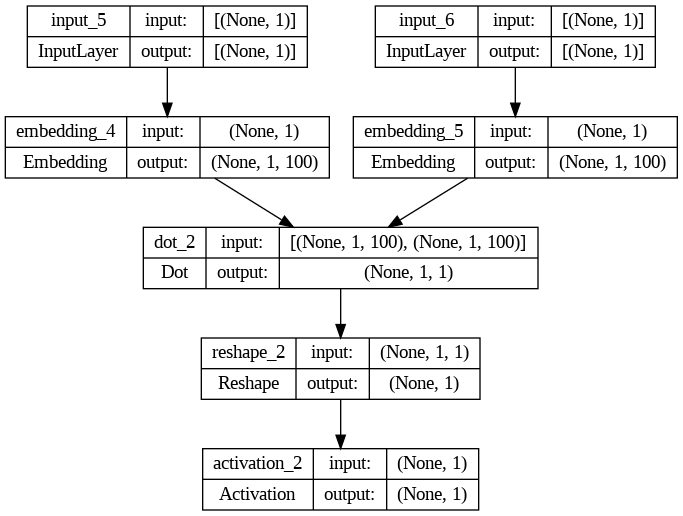

In [238]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [227]:
for epoch in range(100):
  loss = 0
  for _, elem in enumerate(training_dataset):
    first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
    second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
    labels = np.array(elem[1], dtype='int32')
    X = [first_elem, second_elem]
    y = labels
    loss += model.train_on_batch(X, y)
  print("Epoch:", epoch+1, "Loss:", loss)

Epoch: 1 Loss: 3.4646581411361694
Epoch: 2 Loss: 3.451669931411743
Epoch: 3 Loss: 3.439256727695465
Epoch: 4 Loss: 3.4261470437049866
Epoch: 5 Loss: 3.411795675754547
Epoch: 6 Loss: 3.395745277404785
Epoch: 7 Loss: 3.377599537372589
Epoch: 8 Loss: 3.35701185464859
Epoch: 9 Loss: 3.333681583404541
Epoch: 10 Loss: 3.3073513507843018
Epoch: 11 Loss: 3.277806878089905
Epoch: 12 Loss: 3.2448768615722656
Epoch: 13 Loss: 3.2084306478500366
Epoch: 14 Loss: 3.1683804392814636
Epoch: 15 Loss: 3.1246787309646606
Epoch: 16 Loss: 3.0773186683654785
Epoch: 17 Loss: 3.0263344049453735
Epoch: 18 Loss: 2.971800744533539
Epoch: 19 Loss: 2.9138324856758118
Epoch: 20 Loss: 2.852582633495331
Epoch: 21 Loss: 2.7882405519485474
Epoch: 22 Loss: 2.7210296988487244
Epoch: 23 Loss: 2.6512044072151184
Epoch: 24 Loss: 2.579047203063965
Epoch: 25 Loss: 2.5048635601997375
Epoch: 26 Loss: 2.4289779365062714
Epoch: 27 Loss: 2.3517287969589233
Epoch: 28 Loss: 2.273463100194931
Epoch: 29 Loss: 2.194532036781311
Epoch: 3

In [82]:
import gensim

In [228]:
vectors = model.get_weights()[0]
vectors

array([[ 0.03635036,  0.00597904, -0.04785777, ...,  0.00215773,
        -0.01174965, -0.00229257],
       [-0.32079124, -0.11342748, -0.2038375 , ..., -0.13775326,
        -0.1496536 ,  0.18757245],
       [-0.31183708, -0.17493542, -0.29435647, ...,  0.26657078,
         0.2404693 ,  0.06210108],
       ...,
       [-0.04390978,  0.04980203,  0.00426288, ..., -0.01085158,
        -0.00556501, -0.03863759],
       [-0.04620406, -0.02424164, -0.01823288, ...,  0.03743454,
        -0.04823859, -0.03021944],
       [ 0.03022475, -0.03052223, -0.02352686, ..., -0.04145435,
         0.02747966, -0.03769058]], dtype=float32)

In [239]:
f = open('vectors.txt', 'w')
f.write('{} {}\n'.format(vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i-1, :])))))
f.close()

In [240]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('vectors.txt', binary=False)

In [242]:
w2v.most_similar(positive=['피로'])

[('발효', 0.4106045067310333),
 ('능숙한', 0.37145793437957764),
 ('노숙', 0.3569457232952118),
 ('떨리기', 0.3560563921928406),
 ('갈', 0.35537171363830566),
 ('관내', 0.35032016038894653),
 ('신하였다', 0.34985682368278503),
 ('덮치곤', 0.3493007719516754),
 ('명도', 0.3492369055747986),
 ('쩌렁쩌렁', 0.34651610255241394)]

In [241]:
w2v.most_similar(positive=['전쟁'])

[('쏘기', 0.4042750298976898),
 ('당당하게', 0.40288832783699036),
 ('우여곡절', 0.4002548158168793),
 ('사다리꼴', 0.3911634683609009),
 ('임원진', 0.37608376145362854),
 ('물가', 0.3681586682796478),
 ('썰더니', 0.3680151700973511),
 ('가하자', 0.3610525131225586),
 ('와드득대', 0.36027324199676514),
 ('좋아하여', 0.3565480709075928)]